In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s %(levelname)-10s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)
%matplotlib inline

In [2]:
with pd.HDFStore('train.h5') as train:
    df = train.get('train')

In [7]:
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score

def recurrent_linear_fit(df,col,quantile=0.99,min_train_fraction=0.9):
    logging.info("recurrent linear fit to '%s'",col)
    X = df.loc[:,[col]]
    train_index = X.dropna().index
    X = df.loc[train_index,[col]]
    y = df.y[train_index]
    internal_model = LinearRegression(fit_intercept=True,copy_X=False)
    ransac = RANSACRegressor(internal_model)
    ransac.fit(X,y)
    score = r2_score(y,ransac.predict(X))
    logging.debug("RANSAC: iterations = %d, inlier fraction = %.2f%%",ransac.n_trials_,np.sum(ransac.inlier_mask_)*100./len(X))
    logging.debug("col = %s: score = %.7f",col,score)
        
    return ransac.estimator_,score

In [11]:
cols2fit = df.drop(['id','timestamp','y'],axis=1).columns
logging.info("performing recurrent linear fit to %d columns",len(cols2fit))
models = {}
for c in cols2fit[:1]:
    m,s = recurrent_linear_fit(df,c)
    models[c] = {'model': m, 'score': s}

14:02:06 INFO       performing recurrent linear fit to 108 columns
14:02:06 INFO       recurrent linear fit to 'derived_0'
14:02:06 DEBUG      RANSAC: iterations = 18, inlier fraction = 48.47%
14:02:06 DEBUG      col = derived_0: score = -1107.2126534


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-2.6079523, -2.5879523, -2.5679523, -2.5479523, -2.5279523,
        -2.5079523, -2.4879523, -2.4679523, -2.4479523, -2.4279523,
        -2.4079523, -2.3879523, -2.3679523, -2.3479523, -2.3279523,
        -2.3079523, -2.2879523, -2.2679523, -2.2479523, -2.2279523,
        -2.2079523, -2.1879523, -2.1679523, -2.1479523, -2.1279523,
        -2.1079523, -2.0879523, -2.0679523, -2.0479523, -2.0279523,
        -2.0079523, -1.9879523, -1.9679523, -1.9479523, -1.9279523,
        -1.9079523, -1.8879523, -1.8679523, -1.8479523, -1.8279523,
        -1.8079523, -1.7879523, -1.7679523, -1.7479523, -1.7279523,
        -1.7079523, -1.6879523, -1.6679523, -1.6479523, -1.6279523,
        -1.6079523]),
 <a list of 50

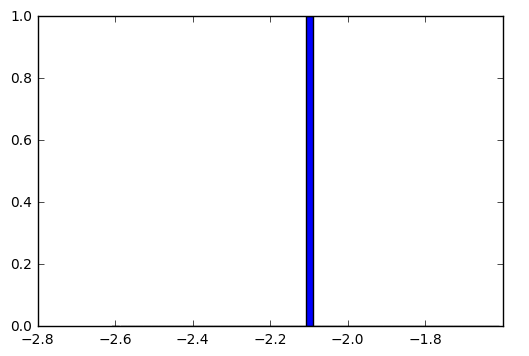

In [10]:
scores = sorted([a['score'] for a in models.values()])
plt.hist(scores,bins=50)

In [30]:
m = models['derived_0']['model']
print(m.coef_)
print(m.intercept_)
print(m.score([[0],[0]],[2,1]))
print(m.predict([[0]]))

[ -5.75147033e-08]
2.12881293131e-05
-8.99974454426
[  2.12881293e-05]
